# Wrangle Twitter Data
## Introduction
In this project data is gathered from three different sources: twitter data archive, udacity server, and twitter API. This gathered data is then merged together and accessed for cleaning. Necessary cleaning operations are performed. Finally exploratory data visualizations are produced to explore the cleaned data.
- [Gather Data](#Gather)
- [Access Data](#Access)
- [Clean Data](#Clean)
- [Exploratory Data Visualization](#Visualize)


In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import re
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
#To display full text of twitter text expand colwidth of jupyter notebook
pd.options.display.max_colwidth=150

<a id='Gather'></a>
### 1. Gather Data

Import twitter-archive-enhanced.csv data

In [3]:
#Import data from twitter-archive-enhanced.csv file
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Import image_prediction.tsv file from udacity server using requests library

In [4]:
#Read file from udacity server using requests library
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [5]:
#Download the server file and save in a folder named Server_file, if folder not present create folder
foldername='Server_file'
if not os.path.exists(foldername):
    os.makedirs(foldername)
with open(os.path.join(foldername,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)
    
#Print folder directory
os.listdir(foldername)

['image-predictions.tsv']

In [6]:
#Read the image-predictions.tsv file and save as a dataframe
server_data=pd.read_csv('./Server_file/image-predictions.tsv',delimiter='\t')
server_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Import retweet status data from twitter using tweepy api and access tokens

In [7]:
#Acces the twitter data using access token and credentials
access_token = 'My access token'
access_secret = 'My access secret'
consumer_key = 'My consumer key'
consumer_secret = 'My consumer secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
#Save the twitter_archive tweet id column as a list- id_of_tweet
id_of_tweet=twitter_data['tweet_id']

Using tweepy api get status for each tweet_id and store its corresponding retweet_count, favorite_count, retweet-status and image url in a tweet_jason.txt file

In [9]:
#Please wait processing of this block takes 15mins

with open("tweet_json.txt", "w") as txtfile:
    txtfile.write('tweet_id retweet_count favorite_count retweeted image_url media_type\n')
    for tweet_id in id_of_tweet:
        try:
            tweet = api.get_status(str(tweet_id),tweet_mode='extended')
        except tweepy.TweepError:
            retweeted="No_data"
            retweet_count="No_data"
            favorites_count="No_data"
            image="No_data"
            media_type="No_data"
        else: # only gets executed if the try clause did not fail  
            retweeted=tweet.retweeted
            retweet_count = tweet.retweet_count
            favorites_count = tweet.favorite_count
            try: 
                image=tweet.entities['media'][0]['url']
                media_type=tweet.entities['media'][0]['type']
            except KeyError:
                image="No_image"
                media_type="No_media"
            txtfile.write(str(tweet_id)+' '+str(retweet_count)+' '+str(favorites_count)+' '+str(retweeted)+' '+str(image)+' '+str(media_type)+'\n')

No handlers could be found for logger "tweepy.binder"


Read tweet_json.txt file and print few rows

In [10]:
api_data=pd.read_csv('tweet_json.txt',sep=' ')
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,image_url,media_type
0,892420643555336193,8314,38016,False,https://t.co/MgUWQ76dJU,photo
1,892177421306343426,6142,32636,False,https://t.co/0Xxu71qeIV,photo
2,891815181378084864,4067,24560,False,https://t.co/wUnZnhtVJB,photo
3,891689557279858688,8459,41368,False,https://t.co/tD36da7qLQ,photo
4,891327558926688256,9158,39548,False,https://t.co/AtUZn91f7f,photo


<a id='Access'></a>
### 2. Access Data

#### Visual accessment:

1.) After viewing twitter archive data in excel it was observed that the timestamp column has two variables: date and time. Date and time needs to be extracted separatly for analysis.


2.) Also, the text column in twitter archive data has three varibles: tweet text, rating, and image url. This three variables can also be extracted separately.

3.) Numerator ratings and ratings in twitter text do not match, eg on index 46 rating is 13.5 whereas it is 13 in rating_numerator.

#### Programming accessment


In [11]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

4.) Datatype of rating_numerator should be float instead of int64

5.) As can be seen above doggo, floofer, pupper, puppo columns is one variable that identifies stage of dog hence it should be combined into a single column. This is a Tidyness issue.

In [13]:
twitter_data['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [14]:
for i in range(0,twitter_data.shape[0]):
    if (twitter_data['name'][i].islower()==True):
        print(twitter_data['name'][i])

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


6.) As can be seen from above the name column has inaccurate information like dog names: such, a, an, very

In [15]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


7.) As can be seen from above that the maximum rating_denominator is not consistent.This is an accuracy issue, hence an Quality issue

In [16]:
server_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


8.) If observed the server data head, there are columns p1, p2, p3 which convey the same meaning dog breed. This three columns can be converted into one column by comparing their corresponding p_conf values and p_dog if True.

In [17]:
server_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


9.) As can be seen from above tweet_id datatype is int64, whereas it should be object, because they are not numeric. This is an Quality issue

In [18]:
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,image_url,media_type
0,892420643555336193,8314,38016,False,https://t.co/MgUWQ76dJU,photo
1,892177421306343426,6142,32636,False,https://t.co/0Xxu71qeIV,photo
2,891815181378084864,4067,24560,False,https://t.co/wUnZnhtVJB,photo
3,891689557279858688,8459,41368,False,https://t.co/tD36da7qLQ,photo
4,891327558926688256,9158,39548,False,https://t.co/AtUZn91f7f,photo


In [19]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
retweeted         2340 non-null bool
image_url         2340 non-null object
media_type        2340 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.8+ KB


10.) The data collected from three different sources needs to merged to a single dataframe for ease of analysis

11.) Also, the datafiles have many unwanted columns that can be removed for analysis

In [20]:
api_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2927.815385,7958.178632
std,6.832564e+16,4932.406615,12325.740263
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,587.750000,1371.000000
50%,7.186224e+17,1367.000000,3458.000000
75%,7.986954e+17,3411.500000,9737.000000
max,8.924206e+17,83604.000000,164219.000000


In [21]:
api_data['media_type'].value_counts()

photo       2067
No_media     273
Name: media_type, dtype: int64

12.) As the requirement of the project we only have to consider the tweets that have media photo. And from api_data we can observe that 273 tweets do not have images and so we should not consider them in our analysis

In [22]:
api_data['retweeted'].value_counts()

False    2340
Name: retweeted, dtype: int64

As can be seen from above no tweets from api_data are retweets

#### So the above accessed issues can be listed as:

#### A.) Quality issues:

#### 1. The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url. Seperate these as individual columns

#### 2. Date and time are stored in single column. Seperate these two as individual columns- Date and Time

#### 3. In image_predictions.tsv file there are three columns p1, p2, p3 that represent the same meaning dog breed and can be reduced to one

#### 4. Change the datatype of rating_numerator to float

#### 5. Change the datatype of tweet_id from int64 to object

#### 6. From data select only those tweets that have images

#### 7. Find where the rating_denominator is not 10 and compare with text extracted ratings and update ratings

#### 8.  Find where the twitter text ratings and given ratings in twitter-archive do not match. Update rating_numerator to the ratings of twitter text

#### 9. The name column has unwanted dog names: a, such, the. This is inaccurate information and should be removed

#### 10.  Select columns of interest. Delete unwanted variables


#### B.) Tidy issues:
#### 1. Merge twitter archive data and data collected from twitter api

#### 2. Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe)

#### 3. The columns: doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog


<a id='Clean'></a>
### 3. Clean Data

### Make copies of original dataframes for cleaning process

In [23]:
twitter_data_copy=twitter_data.copy()
server_data_copy=server_data.copy()
api_data_copy=api_data.copy()

### 3.1 Quality Issues
#### 3.1.1.

#### Define: 
The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url.  Separate these three variables as individual columns- text, text_rating, image_url

#### Code:

In [24]:
#Separate the variables into three independent lists
text=[]
number=[]
url=[]
for tweets in twitter_data_copy['text']:
    t=re.sub(r"\d\S+","",tweets)
    t=re.sub(r'https?:\S+', '', t)
    text.append(t)
    #n=[float(s) for s in re.findall(r'\b\d+\b',tweets)]
    n=re.findall(r"(\d+\.?\d*)/(\d+)",tweets)
    number.append(n)
    u = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweets) 
    url.append(u)

#Add these lists to twitter_data_copy dataframe as individual columns
twitter_data_copy['twitter_text']=text
twitter_data_copy['text_rating']=number
twitter_data_copy['image_url']=url

#### Test:

In [25]:
twitter_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,twitter_text,text_rating,image_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,"[(13, 10)]",[https://t.co/MgUWQ76dJU]
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.","[(13, 10)]",[https://t.co/0Xxu71qeIV]
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,"[(12, 10)]",[https://t.co/wUnZnhtVJB]
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal. happens to the best of us,"[(13, 10)]",[https://t.co/tD36da7qLQ]
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek","[(12, 10)]",[https://t.co/AtUZn91f7f]


The twitter archive rating extracted from text is in string format. Update it to float

In [26]:
tnum=[]
tden=[]
for i in range(0,twitter_data_copy.shape[0]):
    try:
        a=float(twitter_data_copy['text_rating'][i][-1][0])
        b=float(twitter_data_copy['text_rating'][i][-1][1])
    except IndexError:
        a=0
        b=0
    tnum.append(a)
    tden.append(b)
twitter_data_copy['text_rating_numerator']=tnum
twitter_data_copy['text_rating_denominator']=tden

#### 3.1.2. 
#### Define: 
The twitter_data 'timestamp' column has two variables in single column: date and time. Separate these two variables and save them as individual columns date and time in twitter_data
#### Code:

In [27]:
#Separate date and time as individual columns from timestamp column
date = pd.to_datetime(twitter_data_copy['timestamp'], format="%Y-%m-%d  %H:%M:%S +0000")
twitter_data_copy['date']= date.dt.date
twitter_data_copy['time'] = date.dt.time

#### Test

In [28]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
twitter_text                  23

#### 3.1.3. 
#### Define: 
From p1, p2, p3 create one single column selecting from p1, p2, p3 whose corresponding p_conf is highest and p_dog is True
#### Code:

In [29]:
#If Predicted dog breed is not a dog, that is, p1_dog=False, replace its corresponding p_conf value to zero. 
#So we will only consider those results that are dogs
server_data_copy.index=range(len(server_data_copy.tweet_id))
for i in range(0,server_data_copy.shape[0]):
    if server_data_copy['p1_dog'][i]==False:
        server_data_copy.loc[i,'p1_conf']=0
    if server_data_copy['p2_dog'][i]==False:
        server_data_copy.loc[i,'p2_conf']=0
    if server_data_copy['p3_dog'][i]==False:
        server_data_copy.loc[i,'p3_conf']=0       

In [30]:
dog=[]
p_conf=[]
dog_type=[]
server_data_copy.index=range(len(server_data_copy.tweet_id))
for i in range(0,server_data_copy.shape[0]):
    if ((server_data_copy['p1_conf'][i]>server_data_copy['p2_conf'][i])&(server_data_copy['p1_conf'][i]>server_data_copy['p3_conf'][i])):
        p=server_data_copy['p1_conf'][i]
        breed=server_data_copy['p1'][i]
        types=server_data_copy['p1_dog'][i]
    elif ((server_data_copy['p2_conf'][i]>server_data_copy['p1_conf'][i])&(server_data_copy['p2_conf'][i]>server_data_copy['p3_conf'][i])):
        p=server_data_copy['p2_conf'][i]
        breed=server_data_copy['p2'][i]
        types=server_data_copy['p2_dog'][i]
    elif ((server_data_copy['p3_conf'][i]>server_data_copy['p2_conf'][i])&(server_data_copy['p3_conf'][i]>server_data_copy['p1_conf'][i])):
        p=server_data_copy['p3_conf'][i]
        breed=server_data_copy['p3'][i]
        types=server_data_copy['p3_dog'][i]
    elif (server_data_copy['p1_conf'][i]==server_data_copy['p2_conf'][i]==server_data_copy['p3_conf'][i]==0):
        i=i+1
    dog.append(breed)
    p_conf.append(p)
    dog_type.append(types)
server_data_copy['dog_type']=dog
server_data_copy['p_conf']=p_conf
server_data_copy['is_dog']=dog_type
server_data_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,p_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311,True


#### Test:

In [31]:
server_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dog_type    2075 non-null object
p_conf      2075 non-null float64
is_dog      2075 non-null bool
dtypes: bool(4), float64(4), int64(2), object(5)
memory usage: 282.6+ KB


#### 3.1.4 
#### Define:
Change the datatype of rating_numerator to float
#### Code:

In [32]:
twitter_data_copy['rating_numerator']=twitter_data_copy['rating_numerator'].astype('float64')
twitter_data_copy['rating_denominator']=twitter_data_copy['rating_denominator'].astype('float64')

#### Test:

In [33]:
print(twitter_data_copy['rating_numerator'].dtypes)
print(twitter_data_copy['rating_denominator'].dtypes)

float64
float64


#### 3.1.5
#### Define:
Change the datatype of tweet_id to object
#### Code:

In [34]:
twitter_data_copy['tweet_id']=twitter_data_copy['tweet_id'].astype('object')
api_data_copy['tweet_id']=api_data_copy['tweet_id'].astype('object')
server_data_copy['tweet_id']=server_data_copy['tweet_id'].astype('object')

#### Test:

In [35]:
print(twitter_data_copy['tweet_id'].dtypes)
print(api_data_copy['tweet_id'].dtypes)
print(server_data_copy['tweet_id'].dtypes)

object
object
object


#### 3.1.6
#### Define:
From api_data_copy dataframe select only those tweets that have images. That is select all the data for tweets who have media_type=photo
#### Code:

In [36]:
api_data_copy=api_data_copy[api_data_copy['media_type']=="photo"]

#### Test:

In [37]:
api_data_copy['media_type'].value_counts()

photo    2067
Name: media_type, dtype: int64

#### 3.1.7
#### Define:
Find where the rating_denominator is not 10 compare with extracted text denominator rating, update if not same
#### Code:

In [38]:
for i in range(0,twitter_data_copy.shape[0]):
    if (twitter_data_copy['rating_denominator'][i]>10):
        print(' Extracted (Numerator=%.1f, Denominator=%.1f), Actual (Numerator=%.1f, Denominator=%.1f)'%(twitter_data_copy['text_rating_numerator'][i],twitter_data_copy['text_rating_denominator'][i],twitter_data_copy['rating_numerator'][i],twitter_data_copy['rating_denominator'][i]))

 Extracted (Numerator=11.0, Denominator=15.0), Actual (Numerator=11.0, Denominator=15.0)
 Extracted (Numerator=84.0, Denominator=70.0), Actual (Numerator=84.0, Denominator=70.0)
 Extracted (Numerator=14.0, Denominator=10.0), Actual (Numerator=9.0, Denominator=11.0)
 Extracted (Numerator=165.0, Denominator=150.0), Actual (Numerator=165.0, Denominator=150.0)
 Extracted (Numerator=14.0, Denominator=10.0), Actual (Numerator=9.0, Denominator=11.0)
 Extracted (Numerator=204.0, Denominator=170.0), Actual (Numerator=204.0, Denominator=170.0)
 Extracted (Numerator=13.0, Denominator=10.0), Actual (Numerator=4.0, Denominator=20.0)
 Extracted (Numerator=11.0, Denominator=10.0), Actual (Numerator=50.0, Denominator=50.0)
 Extracted (Numerator=99.0, Denominator=90.0), Actual (Numerator=99.0, Denominator=90.0)
 Extracted (Numerator=80.0, Denominator=80.0), Actual (Numerator=80.0, Denominator=80.0)
 Extracted (Numerator=45.0, Denominator=50.0), Actual (Numerator=45.0, Denominator=50.0)
 Extracted (Nume

As can be seen from above some places though rating is above 10, it matches the extracted rating from twitter archive text. Update rating where it does not match

In [39]:
for i in range(0,twitter_data_copy.shape[0]):
    if (twitter_data_copy['rating_denominator'][i]!=twitter_data_copy['text_rating_denominator'][i]):
        twitter_data_copy.loc[i,'rating_denominator']=twitter_data_copy['text_rating_denominator'][i]
        twitter_data_copy.loc[i,'rating_numerator']=twitter_data_copy['text_rating_numerator'][i]

#### Test:

In [40]:
for i in range(0,twitter_data_copy.shape[0]):
    if (twitter_data_copy['rating_denominator'][i]!=twitter_data_copy['text_rating_denominator'][i]):
        print("Code did not work")

#### 3.1.8
#### Define:
Update rating where rating_numerator is not same as rating in twitter archive text 
#### Code:

In [41]:
twitter_data_copy.index=range(len(twitter_data_copy.tweet_id))
for i in range(0,twitter_data_copy.shape[0]):
    if twitter_data_copy['text_rating_numerator'][i]!=twitter_data_copy['rating_numerator'][i]:
        print('For %s, rating extracted = %.2f and twitter archive rating = %d' % (twitter_data_copy['tweet_id'][i],twitter_data_copy['text_rating_numerator'][i], twitter_data_copy['rating_numerator'][i]))
        twitter_data_copy.loc[i,'rating_numerator']=twitter_data_copy['text_rating_numerator'][i] #Update rating

For 883482846933004288, rating extracted = 13.50 and twitter archive rating = 5
For 881633300179243008, rating extracted = 13.00 and twitter archive rating = 17
For 832215909146226688, rating extracted = 9.75 and twitter archive rating = 75
For 802624713319034886, rating extracted = 11.00 and twitter archive rating = 12
For 786709082849828864, rating extracted = 9.75 and twitter archive rating = 75
For 778027034220126208, rating extracted = 11.27 and twitter archive rating = 27
For 777684233540206592, rating extracted = 11.00 and twitter archive rating = 12
For 763167063695355904, rating extracted = 11.00 and twitter archive rating = 8
For 747600769478692864, rating extracted = 7.00 and twitter archive rating = 10
For 714258258790387713, rating extracted = 8.00 and twitter archive rating = 10
For 703356393781329922, rating extracted = 2.00 and twitter archive rating = 9
For 695064344191721472, rating extracted = 13.00 and twitter archive rating = 4
For 694352839993344000, rating extrac

#### Test:

In [42]:
twitter_data_copy.index=range(len(twitter_data_copy.tweet_id))
for i in range(0,twitter_data_copy.shape[0]):
    if twitter_data_copy['text_rating_numerator'][i]!=twitter_data_copy['rating_numerator'][i]:
        print("rating_numerator is NOT same as rating in twitter archive text")

#### 3.1.9
#### Define:
The name column has unwanted dog names: a, such, the, very. This is inaccurate information and should be replaced by None
#### Code:

In [45]:
for i in range(0,twitter_data_copy.shape[0]):
    if (twitter_data_copy['name'][i].islower()==True):
        twitter_data_copy.loc[i,'name']="None"
twitter_data_copy['name']=twitter_data_copy['name'].replace('None',np.nan)

#### Test:

In [46]:
twitter_data_copy['name'].value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Bailey        7
Dave          6
Stanley       6
Rusty         6
Scout         6
Milo          6
Jack          6
Jax           6
Koda          6
Leo           6
Bella         6
Oscar         6
Louis         5
Sammy         5
Chester       5
Bentley       5
Alfie         5
             ..
Suki          1
Creg          1
Maisey        1
Kollin        1
Dotsy         1
Tove          1
Ester         1
Glenn         1
Edgar         1
Bronte        1
Grizzie       1
Mollie        1
Teddy         1
Snoop         1
Lenox         1
Jeremy        1
Zooey         1
Todo          1
Kanu          1
Ember         1
Steve         1
Laika         1
Socks         1
Eazy          1
Kane          1
Finnegus      1
Alexander     1
Meatball      1
Zara          1
Opie          1
Name: name, Length: 931,

### 3.2 Tidy Issues

#### 3.2.1
#### Define:
The columns: doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column using pandas melt function as this is one variable that identify stage of dog
#### Code:

In [47]:
twitter_data_copy=twitter_data_copy.replace("None","")
twitter_data_copy['stage'] = twitter_data_copy[['doggo','floofer','pupper','puppo']].sum(axis=1)
twitter_data_copy.loc[twitter_data_copy.stage == '', 'stage'] = np.nan
twitter_data_copy['stage'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [48]:
#Handling multiple stages
twitter_data_copy.loc[twitter_data_copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_data_copy.loc[twitter_data_copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_data_copy.loc[twitter_data_copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
twitter_data_copy['tweet_id']=twitter_data_copy['tweet_id'].astype('object')
twitter_data_copy['stage']=twitter_data_copy['stage'].astype('object')

#### Test:

In [49]:
twitter_data_copy['stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

#### 3.2.2

#### Define:
Merge twitter archive data and api_data dataframes on tweet_id column

#### Code:

In [50]:
#Merge twitter archive and api_data dataframes
combined_data=twitter_data_copy.join(api_data_copy.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')

#### Test:

In [51]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
twitter_text               

#### 3.2.3
#### Define:
Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe). Join these dataframes on tweet_id column
#### Code:

In [52]:
#Merging with image prediction dataframe
combined_data=combined_data.join(server_data_copy.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')

#### Test:

In [53]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 44 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
twitter_text               

#### 3.1.10
#### Define:
Select column of interest and create a new dataframe for analysis
#### Code:

In [54]:
data=combined_data[['tweet_id','text','source','twitter_text','rating_numerator','rating_denominator','text_rating','text_rating_numerator','text_rating_denominator','date','time','retweet_count','favorite_count','retweeted','media_type','image_url_left','image_url_right','img_num','expanded_urls','jpg_url','dog_type','p_conf','is_dog','name','stage']]

#### Test:

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                   2356 non-null object
text                       2356 non-null object
source                     2356 non-null object
twitter_text               2356 non-null object
rating_numerator           2356 non-null float64
rating_denominator         2356 non-null float64
text_rating                2356 non-null object
text_rating_numerator      2356 non-null float64
text_rating_denominator    2356 non-null float64
date                       2356 non-null object
time                       2356 non-null object
retweet_count              2067 non-null float64
favorite_count             2067 non-null float64
retweeted                  2067 non-null object
media_type                 2067 non-null object
image_url_left             2356 non-null object
image_url_right            2067 non-null object
img_num                    2075 non-null float64
expanded_urls         

#### Write cleaned data to twitter_archive_master.csv file

In [56]:
data.to_csv('twitter_archive_master.csv', sep = ",",index=False)

<a id='Visualize'></a>
### 4. Exploratory Data Visualization

A box plot to observe the minimum, maximum and mean ratings for all dogs. As can be seen mean rating is 12

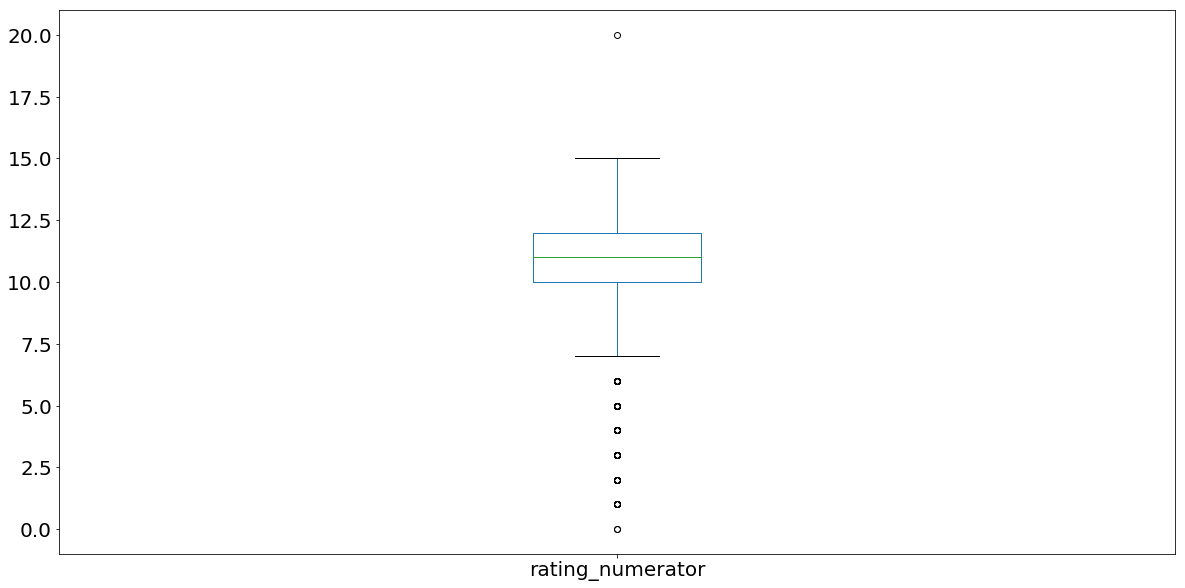

In [57]:
plt.rcParams["figure.figsize"] = (20,10)
rating=data[data['rating_numerator']<=20]['rating_numerator']
rating.plot(y=rating,kind='box',fontsize=20);

Group data by dog type and count the number of dogs in each type

In [58]:
groupby_dog_count=data.groupby(['dog_type'])['tweet_id'].count()
groupby_dog_count.sort_values(ascending=False,inplace=True)

Bar plot to visualize the dog breed and its corresponding count of dogs

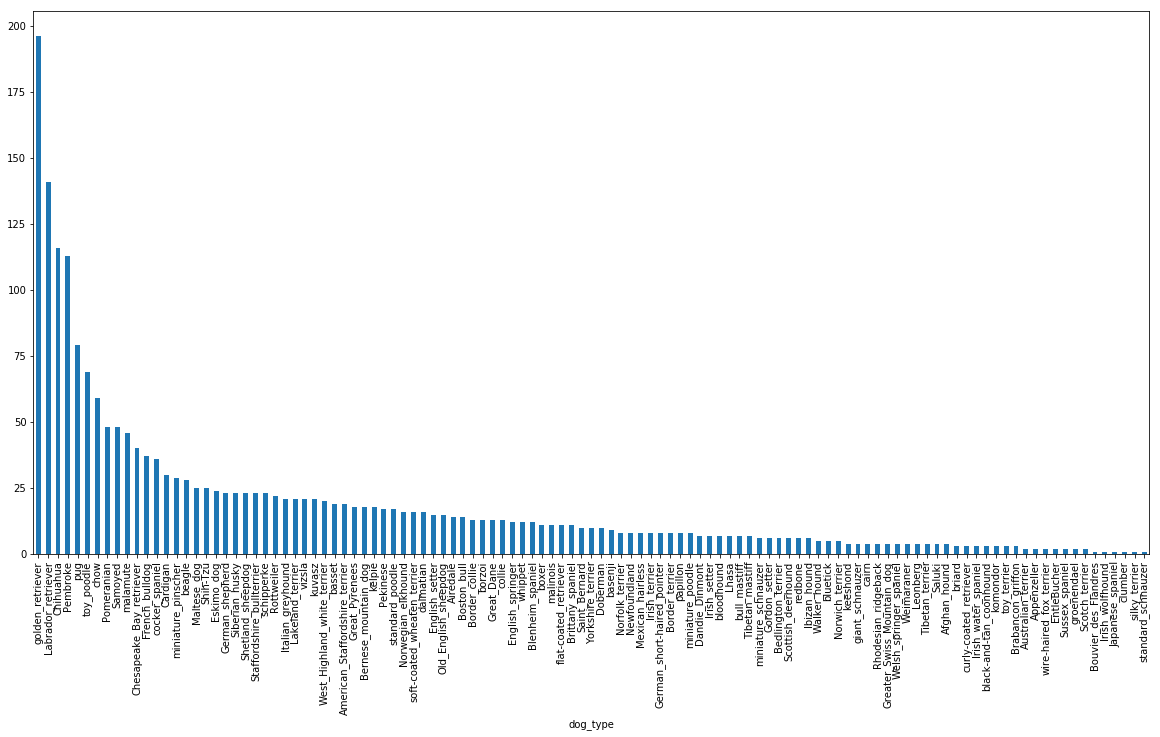

In [59]:
groupby_dog_count.plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar');

To see top 10 dog breed with highest count. As can be seen golden_retrriever has highest count of dogs

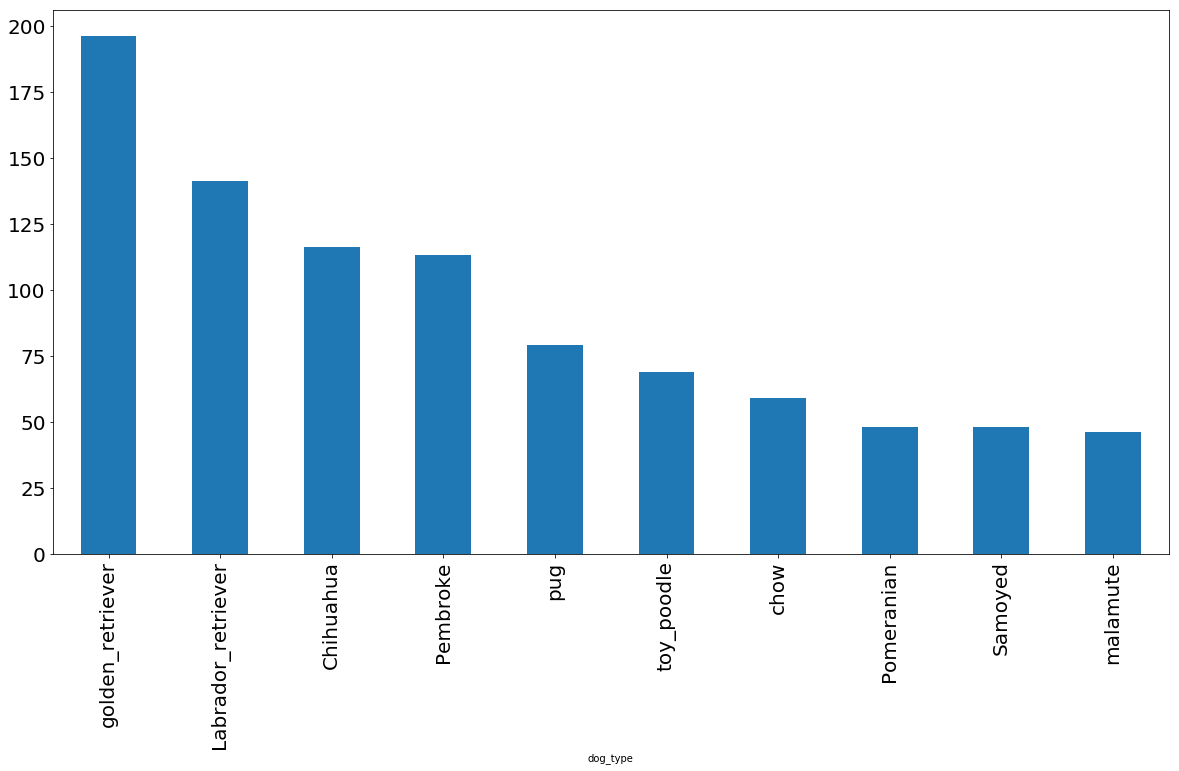

In [60]:
groupby_dog_count[:10].plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar',fontsize=20);

Group the data by dog breed and sum its corresponding rating

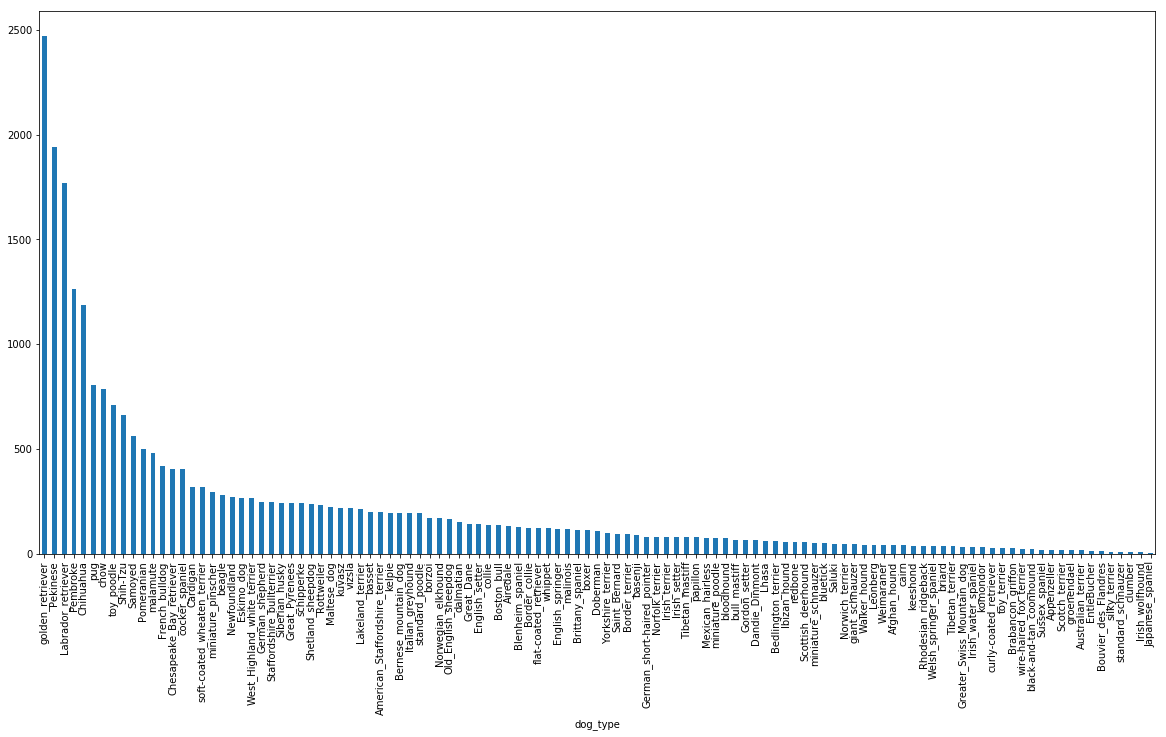

In [61]:
groupby_dog_sum_rating=data.groupby(['dog_type'])['rating_numerator'].sum()
groupby_dog_sum_rating.sort_values(ascending=False,inplace=True)
groupby_dog_sum_rating.plot(x=groupby_dog_sum_rating.index,y=groupby_dog_sum_rating,kind='bar');

A scatter plot to see the relationship betwwen Dog rating and Count varibles. As can be seen there is a strong positive relationship. As the count increases so does the sum of dog ratings.

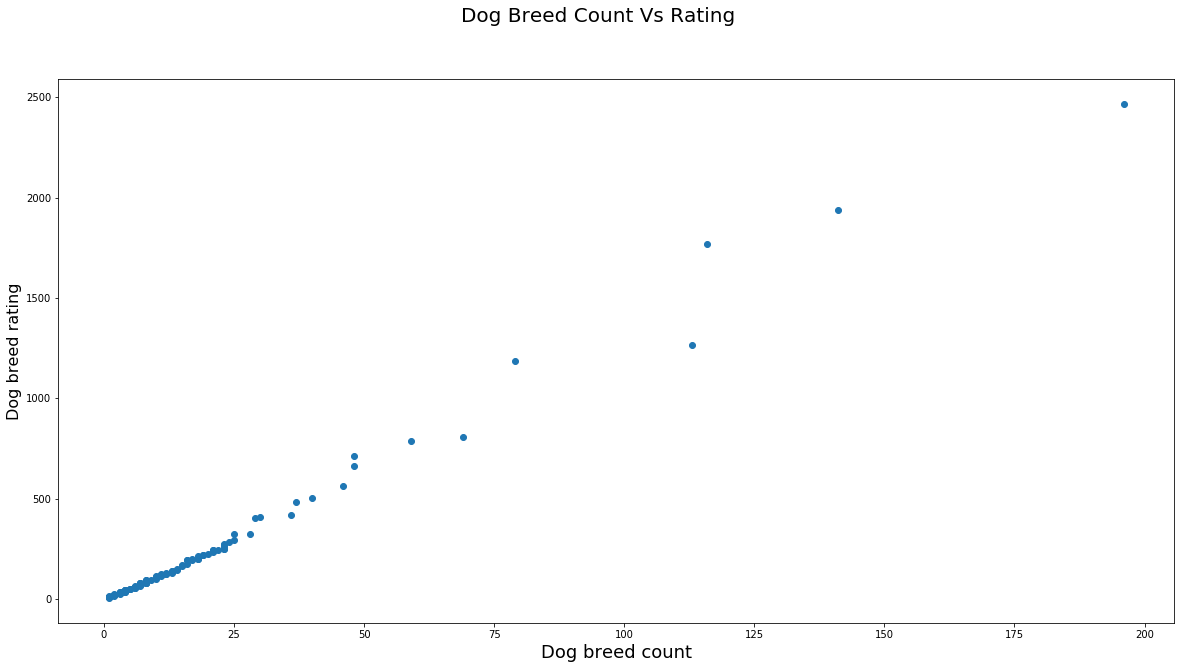

In [62]:
plt.scatter(groupby_dog_count,groupby_dog_sum_rating)
plt.suptitle('Dog Breed Count Vs Rating', fontsize=20)
plt.xlabel('Dog breed count', fontsize=18)
plt.ylabel('Dog breed rating', fontsize=16);

As there is positive relationship between count and sum rating, we should consider mean rating. 
Group data by dog type and take mean of its corresponding ratings

In [63]:
groupby_dog_mean_rating=data.groupby(['dog_type'])['rating_numerator'].mean()
groupby_dog_mean_rating.sort_values(ascending=False,inplace=True)

A bar chart to visualize all mean ratings for all dog types

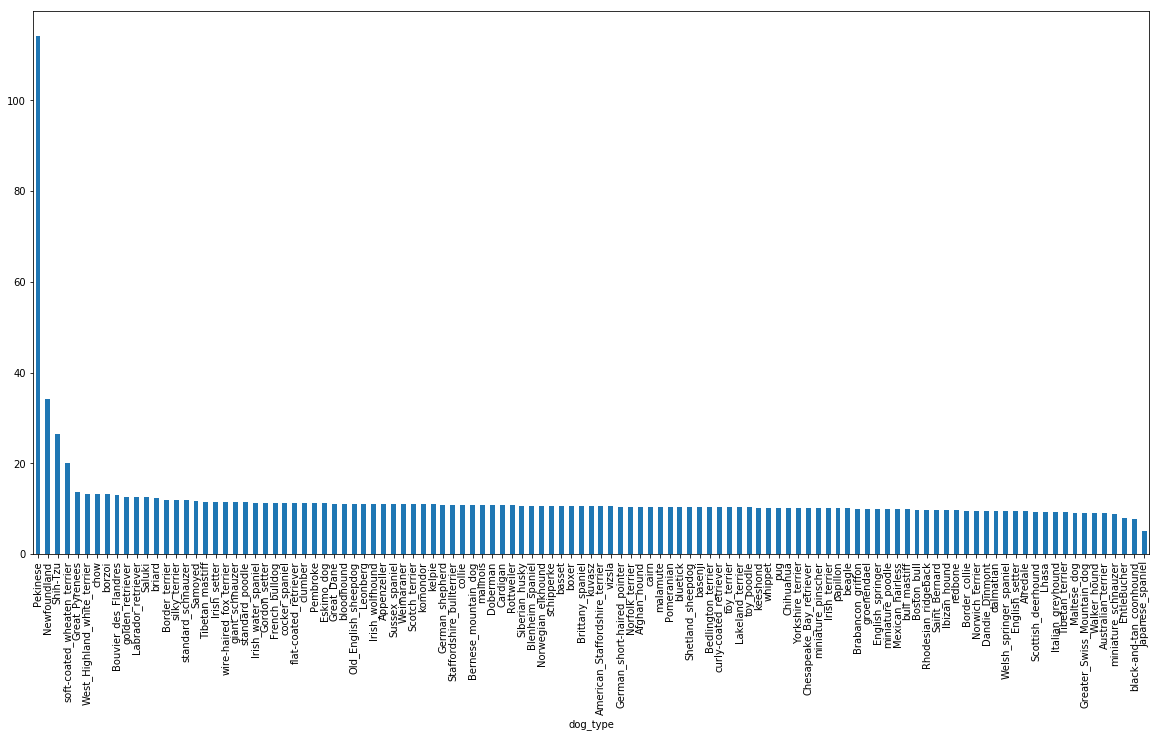

In [64]:
groupby_dog_mean_rating.plot(x=groupby_dog_mean_rating.index,y=groupby_dog_mean_rating,kind='bar');

Group data by tweet date and count of its corresponding tweets

In [65]:
groupby_date_count=data.groupby(['date'])['tweet_id'].count()
groupby_date_count.sort_values(ascending=False,inplace=True)

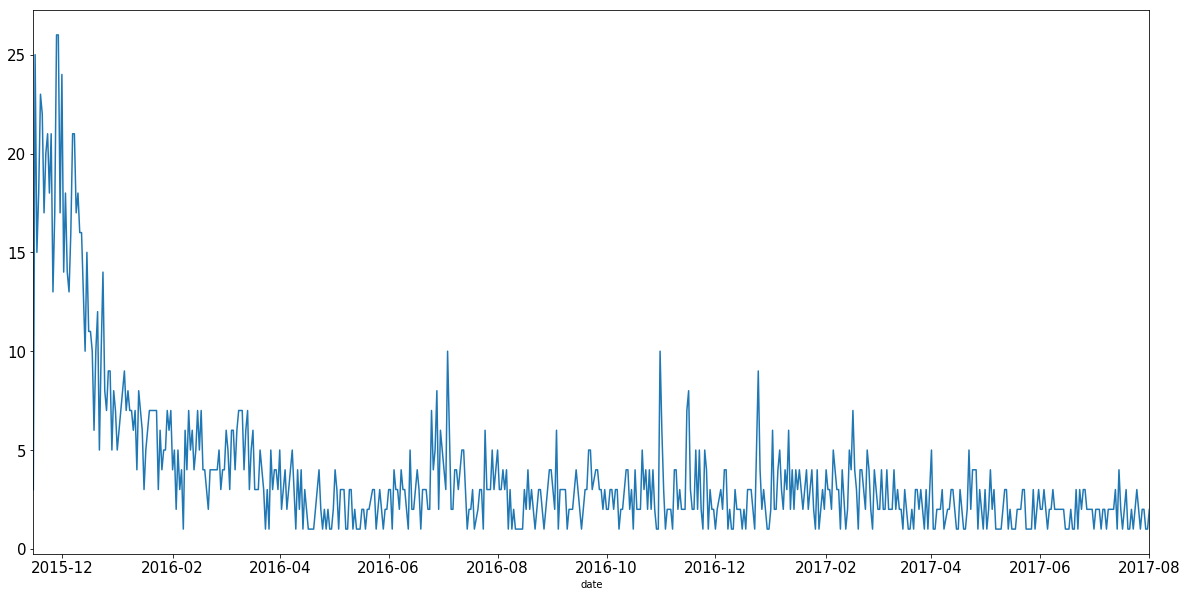

In [66]:
groupby_date_count.plot(x=groupby_date_count.index,y=groupby_date_count,kind='line',fontsize=15);

As can be seen from above highest tweets are posted during period 2015-12 to 2016-02

Group data by dog name and count of its corresponding tweets

In [67]:
groupby_dog_name_count=data.groupby(['name'])['tweet_id'].count()
groupby_dog_name_count.sort_values(ascending=False,inplace=True)

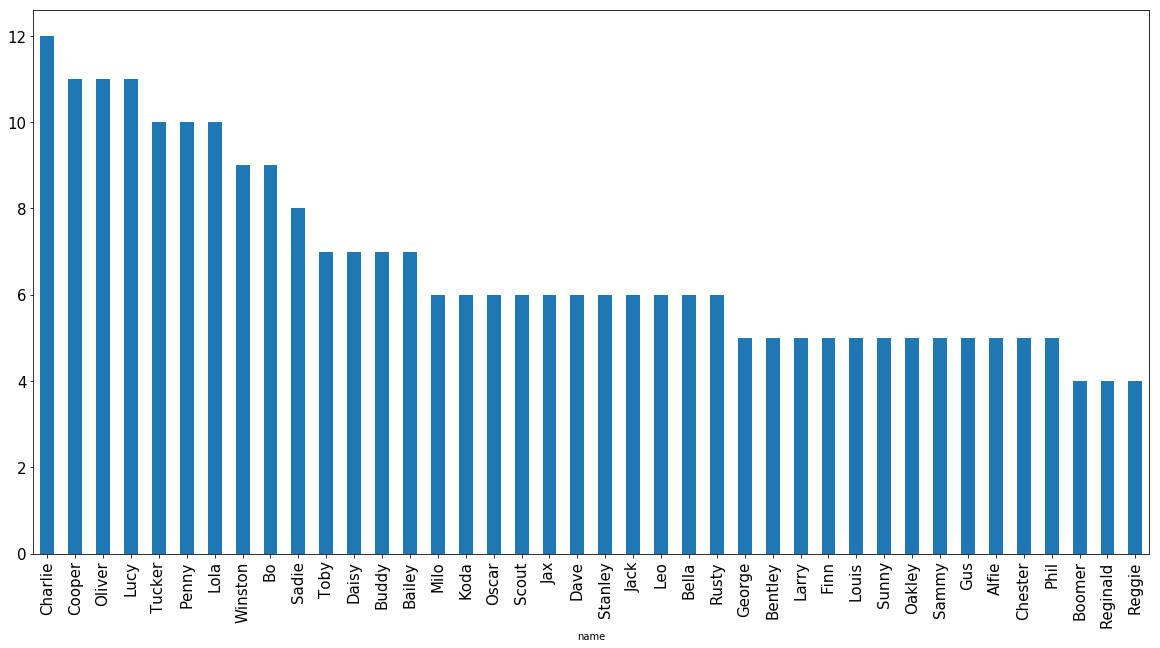

In [68]:
groupby_dog_name_count[:40].plot(x=groupby_dog_name_count.index,y=groupby_dog_name_count,kind='bar',fontsize=15);

As can be seen from above Charlie is the common name given to dogs

In [69]:
groupby_stage_count=data.groupby(['stage'])['tweet_id'].count()
groupby_stage_count.sort_values(ascending=False,inplace=True)

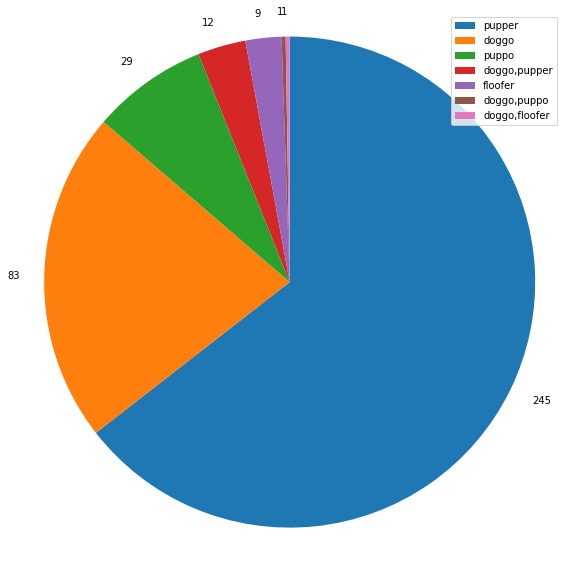

In [70]:
plt.pie(groupby_stage_count,labels=groupby_stage_count,startangle = 90,counterclock = False);
plt.legend(groupby_stage_count.index)
plt.axis('square');

As can be observed from above pie chart, majority of the dogs are pupper